Loading Sinhala texts...
Loaded 3559 texts
Generating images for 3559 texts...
Processed 0/3559 texts
Processed 100/3559 texts
Processed 200/3559 texts
Processed 300/3559 texts
Processed 400/3559 texts
Processed 500/3559 texts
Processed 600/3559 texts
Processed 700/3559 texts
Processed 800/3559 texts
Processed 900/3559 texts
Processed 1000/3559 texts
Processed 1100/3559 texts
Processed 1200/3559 texts
Processed 1300/3559 texts
Processed 1400/3559 texts
Processed 1500/3559 texts
Processed 1600/3559 texts
Processed 1700/3559 texts
Processed 1800/3559 texts
Processed 1900/3559 texts
Processed 2000/3559 texts
Processed 2100/3559 texts
Processed 2200/3559 texts
Processed 2300/3559 texts
Processed 2400/3559 texts
Processed 2500/3559 texts
Processed 2600/3559 texts
Processed 2700/3559 texts
Processed 2800/3559 texts
Processed 2900/3559 texts
Processed 3000/3559 texts
Processed 3100/3559 texts
Processed 3200/3559 texts
Processed 3300/3559 texts
Processed 3400/3559 texts
Processed 3500/3559 tex

C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Matplotlib currently does not support Sinhala natively.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Glyph 3499 (\N{SINHALA LETTER MUURDHAJA NAYANNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Glyph 3530 (\N{SINHALA SIGN AL-LAKUNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_18540\915815731.py:261: UserWarning: Glyph 3540 (\N{SINHALA VOWEL SIGN KETTI P

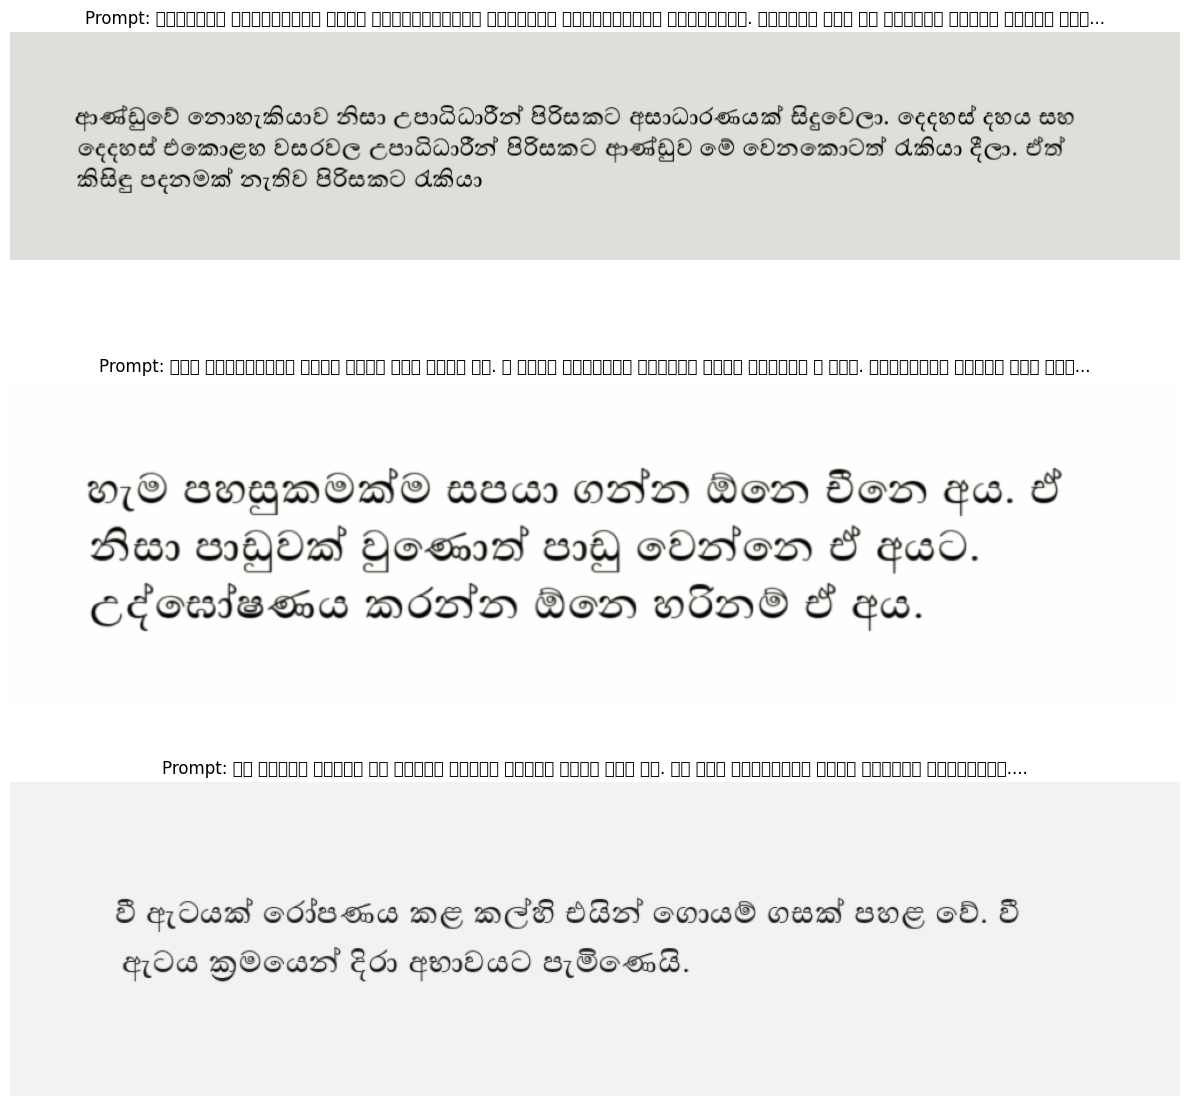


Dataset generation complete!
Images saved in: images
CSV file saved as: dataset.csv


In [10]:
# Sinhala Text Image Generator and Dataset Creator
# Modified to create dataset with only id, prompts, and images

import os
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import textwrap
from datetime import datetime

# Set up paths
PROJECT_PATH = Path(".")
FONT_FILE = PROJECT_PATH / "iskpota.ttf"
IMAGES_DIR = PROJECT_PATH / "images"
OUTPUT_CSV = PROJECT_PATH / "dataset.csv"
PROMPTS_FILE = PROJECT_PATH / "sinhala_prompts.txt"  # Added prompts file definition

# Create images directory if it doesn't exist
IMAGES_DIR.mkdir(exist_ok=True)

class SinhalaImageGenerator:
    def __init__(self, font_path, output_dir):
        self.font_path = font_path
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)
        
        # Font sizes for different document types
        self.font_sizes = [24, 28, 32, 36, 40, 44, 48]
        
        # Background colors (paper-like)
        self.bg_colors = [
            (255, 255, 255),  # White
            (250, 250, 245),  # Off-white
            (245, 245, 240),  # Cream
            (248, 248, 246),  # Light cream
        ]
        
        # Text colors (ink-like)
        self.text_colors = [
            (0, 0, 0),        # Black
            (20, 20, 20),     # Dark gray
            (10, 10, 10),     # Very dark gray
            (0, 0, 50),       # Very dark blue
        ]
        
    def load_font(self, size):
        """Load font with given size"""
        try:
            return ImageFont.truetype(str(self.font_path), size)
        except:
            print(f"Warning: Could not load font {self.font_path}, using default")
            return ImageFont.load_default()
    
    def wrap_text(self, text, font, max_width):
        """Wrap text to fit within max_width"""
        words = text.split()
        lines = []
        current_line = []
        
        for word in words:
            # Test if adding this word would exceed max_width
            test_line = ' '.join(current_line + [word])
            bbox = font.getbbox(test_line)
            text_width = bbox[2] - bbox[0]
            
            if text_width <= max_width:
                current_line.append(word)
            else:
                if current_line:
                    lines.append(' '.join(current_line))
                    current_line = [word]
                else:
                    # Single word is too long, add it anyway
                    lines.append(word)
        
        if current_line:
            lines.append(' '.join(current_line))
        
        return lines
    
    def add_noise(self, image):
        """Add various types of noise to simulate scanning artifacts"""
        # Convert to numpy array
        img_array = np.array(image)
        
        # Add gaussian noise
        noise = np.random.normal(0, 5, img_array.shape)
        img_array = np.clip(img_array + noise, 0, 255).astype(np.uint8)
        
        # Add salt and pepper noise
        salt_pepper = np.random.random(img_array.shape[:2])
        img_array[salt_pepper < 0.001] = 0  # Salt
        img_array[salt_pepper > 0.999] = 255  # Pepper
        
        return Image.fromarray(img_array)
    
    def add_blur(self, image):
        """Add slight blur to simulate scanning"""
        blur_radius = random.uniform(0.3, 0.8)
        return image.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    
    def adjust_contrast_brightness(self, image):
        """Randomly adjust contrast and brightness"""
        # Brightness
        brightness = random.uniform(0.9, 1.1)
        enhancer = ImageEnhance.Brightness(image)
        image = enhancer.enhance(brightness)
        
        # Contrast
        contrast = random.uniform(0.8, 1.2)
        enhancer = ImageEnhance.Contrast(image)
        image = enhancer.enhance(contrast)
        
        return image
    
    def create_document_image(self, text, image_id):
        """Create a document-like image with the given text"""
        # Random parameters
        font_size = random.choice(self.font_sizes)
        bg_color = random.choice(self.bg_colors)
        text_color = random.choice(self.text_colors)
        
        # Load font
        font = self.load_font(font_size)
        
        # Image dimensions
        width = random.randint(800, 1200)
        margin = random.randint(50, 100)
        line_spacing = random.randint(5, 15)
        
        # Create base image
        temp_img = Image.new('RGB', (width, 100), bg_color)
        temp_draw = ImageDraw.Draw(temp_img)
        
        # Wrap text
        max_text_width = width - 2 * margin
        lines = self.wrap_text(text, font, max_text_width)
        
        # Calculate total height needed
        total_height = margin * 2
        for line in lines:
            bbox = font.getbbox(line)
            line_height = bbox[3] - bbox[1]
            total_height += line_height + line_spacing
        
        # Create final image
        image = Image.new('RGB', (width, total_height), bg_color)
        draw = ImageDraw.Draw(image)
        
        # Draw text
        y_position = margin
        for line in lines:
            bbox = font.getbbox(line)
            line_height = bbox[3] - bbox[1]
            
            # Add some random horizontal offset
            x_offset = random.randint(-3, 3)
            draw.text((margin + x_offset, y_position), line, fill=text_color, font=font)
            y_position += line_height + line_spacing
        
        # Apply post-processing effects
        if random.random() < 0.7:  # 70% chance to add blur
            image = self.add_blur(image)
        
        if random.random() < 0.5:  # 50% chance to add noise
            image = self.add_noise(image)
        
        if random.random() < 0.8:  # 80% chance to adjust contrast/brightness
            image = self.adjust_contrast_brightness(image)
        
        # Save image
        image_path = self.output_dir / f"sinhala_doc_{image_id:05d}.png"
        image.save(image_path)
        
        return str(image_path.name), text
    
    def generate_dataset(self, texts, num_images_per_text=1):
        """Generate dataset from list of texts"""
        dataset = []
        image_id = 1
        
        print(f"Generating images for {len(texts)} texts...")
        
        for i, text in enumerate(texts):
            if i % 100 == 0:
                print(f"Processed {i}/{len(texts)} texts")
            
            # Skip empty texts
            if not text.strip():
                continue
            
            for j in range(num_images_per_text):
                try:
                    image_filename, original_text = self.create_document_image(text.strip(), image_id)
                    
                    dataset.append({
                        'id': image_id,
                        'prompts': original_text,
                        'images': image_filename
                    })
                    
                    image_id += 1
                    
                except Exception as e:
                    print(f"Error generating image for text {i}: {e}")
                    continue
        
        return dataset

def load_sinhala_texts(file_path):
    """Load Sinhala texts from file"""
    texts = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if line:
                    texts.append(line)
    except FileNotFoundError:
        print(f"File {file_path} not found!")
        return []
    except Exception as e:
        print(f"Error reading file: {e}")
        return []
    
    return texts

def create_dataset_csv(dataset, output_path):
    """Create CSV dataset file"""
    df = pd.DataFrame(dataset)
    # Keep only the required columns
    df = df[['id', 'prompts', 'images']]
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Dataset saved to {output_path}")
    
    # Print statistics
    print(f"\nDataset Statistics:")
    print(f"Total images: {len(df)}")
    print(f"Sample prompt: {df['prompts'].iloc[0][:50]}...")

def visualize_samples(dataset, images_dir, num_samples=5):
    """Visualize some sample images from the dataset"""
    sample_data = random.sample(dataset, min(num_samples, len(dataset)))
    
    fig, axes = plt.subplots(num_samples, 1, figsize=(12, 4 * num_samples))
    if num_samples == 1:
        axes = [axes]
    
    for i, data in enumerate(sample_data):
        image_path = Path(images_dir) / data['images']
        if image_path.exists():
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(f"Prompt: {data['prompts'][:100]}...")
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Check if required files exist
    if not PROMPTS_FILE.exists():
        print(f"Error: {PROMPTS_FILE} not found!")
        print("Please ensure you have the sinhala_prompts.txt file in the project directory")
    elif not FONT_FILE.exists():
        print(f"Error: {FONT_FILE} not found!")
        print("Please ensure you have the iskpota.ttf font file in the project directory")
    else:
        # Load Sinhala texts
        print("Loading Sinhala texts...")
        texts = load_sinhala_texts(PROMPTS_FILE)
        print(f"Loaded {len(texts)} texts")
        
        if texts:
            # Initialize generator
            generator = SinhalaImageGenerator(FONT_FILE, IMAGES_DIR)
            
            # Generate dataset
            dataset = generator.generate_dataset(texts, num_images_per_text=1)
            
            if dataset:
                # Create CSV file
                create_dataset_csv(dataset, OUTPUT_CSV)
                
                # Visualize samples
                print("\nGenerating sample visualizations...")
                visualize_samples(dataset, IMAGES_DIR, num_samples=3)
                
                print(f"\nDataset generation complete!")
                print(f"Images saved in: {IMAGES_DIR}")
                print(f"CSV file saved as: {OUTPUT_CSV}")
            else:
                print("No images were generated!")
        else:
            print("No texts found to process!")